**1. Imports:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
   creating: data/paper/
  inflating: __MACOSX/data/._paper   
   creating: data/metal/
  inflating: __MACOSX/data/._metal   
   creating: data/cardboard/
  inflating: __MACOSX/data/._cardboard  
   creating: data/glass/
  inflating: __MACOSX/data/._glass   
   creating: data/plastic/
  inflating: __MACOSX/data/._plastic  
  inflating: data/paper/paper283.jpg  
  inflating: __MACOSX/data/paper/._paper283.jpg  
  inflating: data/paper/paper297.jpg  
  inflating: __MACOSX/data/paper/._paper297.jpg  
  inflating: data/paper/paper526.jpg  
  inflating: __MACOSX/data/paper/._paper526.jpg  
  inflating: data/paper/paper240.jpg  
  inflating: __MACOSX/data/paper/._paper240.jpg  
  inflating: data/paper/paper254.jpg  
  inflating: __MACOSX/data/paper/._paper254.jpg  
  inflating: data/paper/paper532.jpg  
  inflating: __MACOSX/data/paper/._paper532.jpg  
  inflating: data/paper/paper268.jpg  
  inflating: __MACOSX/data

**2. Data preparation:**

In [3]:
file_path="data"

x=[]

for folder in os.listdir(file_path):
    sub_path=file_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x.append(img_arr)

In [4]:
x=np.array(x)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [14]:
training_set = train_datagen.flow_from_directory(file_path, target_size = (384, 512),
                                                 batch_size = 120, class_mode = "categorical")

Found 2390 images belonging to 5 classes.


In [15]:
train_y=training_set.classes

training_set.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}

In [16]:
train_y.shape

(2390,)

**2. First model:**

In [17]:
first_model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', 
           input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=12, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=18, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

first_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 192, 256, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 96, 128, 10)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 64, 12)      

In [18]:
first_model.compile(optimizer="adam", 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["accuracy"])

early_stop=EarlyStopping(monitor="accuracy",
                         mode="auto",
                         verbose=1,
                         patience=10)

In [19]:
first_results = first_model.fit(x,
                                train_y,
                                validation_split=0.05,
                                epochs=50,
                                callbacks=[early_stop])

Epoch 1/50
71/71 [==============================] - 8s 98ms/step - loss: 4.5241 - accuracy: 0.2370 - val_loss: 1.6319 - val_accuracy: 0.1083
Epoch 2/50
71/71 [==============================] - 7s 95ms/step - loss: 1.5665 - accuracy: 0.3062 - val_loss: 1.5959 - val_accuracy: 0.1083
Epoch 3/50
71/71 [==============================] - 7s 98ms/step - loss: 1.5199 - accuracy: 0.3401 - val_loss: 1.4868 - val_accuracy: 0.2583
Epoch 4/50
71/71 [==============================] - 7s 98ms/step - loss: 1.4814 - accuracy: 0.3652 - val_loss: 1.3962 - val_accuracy: 0.3583
Epoch 5/50
71/71 [==============================] - 7s 96ms/step - loss: 1.4561 - accuracy: 0.3806 - val_loss: 1.5438 - val_accuracy: 0.2000
Epoch 6/50
71/71 [==============================] - 7s 96ms/step - loss: 1.4332 - accuracy: 0.4004 - val_loss: 1.7362 - val_accuracy: 0.0833
Epoch 7/50
71/71 [==============================] - 7s 97ms/step - loss: 1.3976 - accuracy: 0.4048 - val_loss: 1.5579 - val_accuracy: 0.1750
Epoch 8/50
71

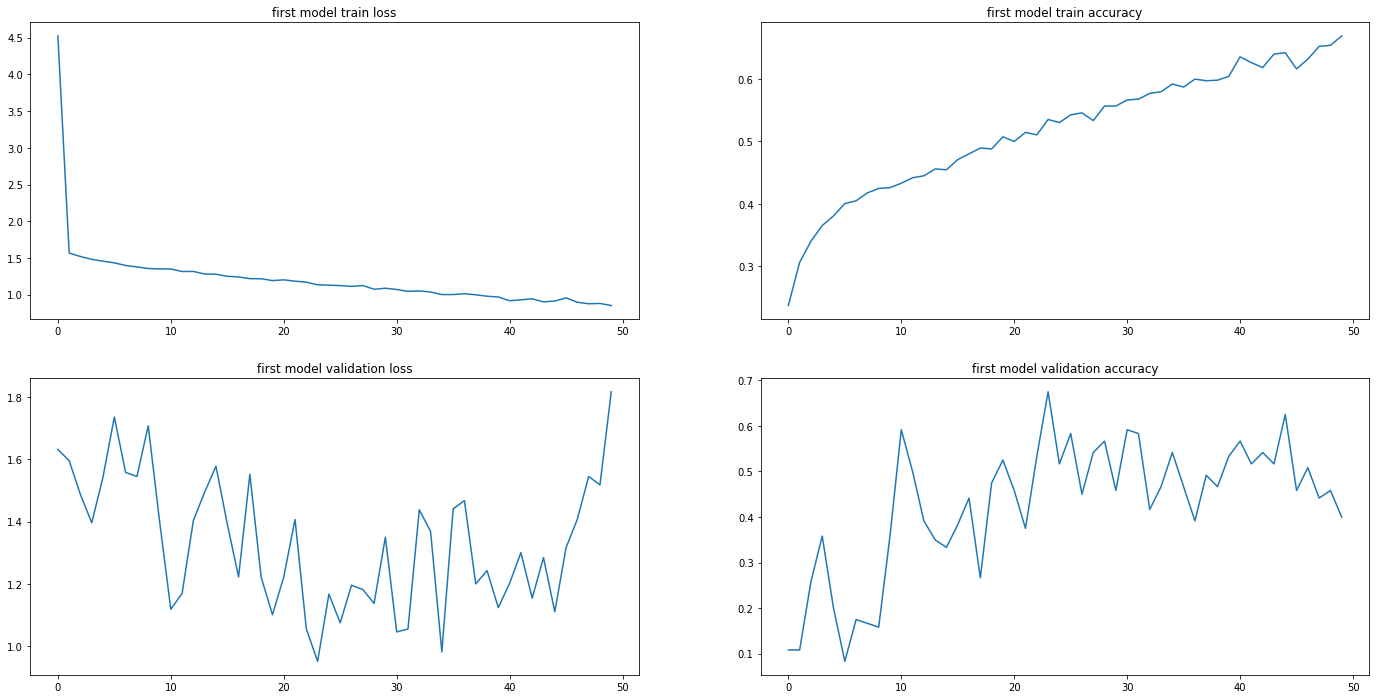

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(first_results.history["loss"])
ax[0][1].plot(first_results.history["accuracy"])
ax[1][0].plot(first_results.history["val_loss"])
ax[1][1].plot(first_results.history["val_accuracy"])

ax[0][0].set_title("first model train loss")
ax[0][1].set_title("first model train accuracy")
ax[1][0].set_title("first model validation loss")
ax[1][1].set_title("first model validation accuracy")
plt.show()

**3. Second model:**

In [21]:
second_model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', 
           input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=24, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=40, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=48, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

second_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 192, 256, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 192, 256, 16)      1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 96, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 96, 128, 24)       3480      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 64, 24)      

In [22]:
second_model.compile(optimizer="adam", 
                     loss="sparse_categorical_crossentropy", 
                     metrics=["accuracy"])

In [23]:
second_results = second_model.fit(x,
                                  train_y,
                                  validation_split=0.05,
                                  epochs=50,
                                  callbacks=[early_stop])

Epoch 1/50
71/71 [==============================] - 9s 115ms/step - loss: 2.5403 - accuracy: 0.2846 - val_loss: 1.5320 - val_accuracy: 0.0833
Epoch 2/50
71/71 [==============================] - 7s 103ms/step - loss: 1.4369 - accuracy: 0.3833 - val_loss: 1.7711 - val_accuracy: 0.0500
Epoch 3/50
71/71 [==============================] - 7s 103ms/step - loss: 1.3469 - accuracy: 0.4084 - val_loss: 1.4486 - val_accuracy: 0.2667
Epoch 4/50
71/71 [==============================] - 7s 104ms/step - loss: 1.2912 - accuracy: 0.4577 - val_loss: 1.2111 - val_accuracy: 0.4333
Epoch 5/50
71/71 [==============================] - 7s 104ms/step - loss: 1.2652 - accuracy: 0.4670 - val_loss: 1.4219 - val_accuracy: 0.3667
Epoch 6/50
71/71 [==============================] - 7s 105ms/step - loss: 1.2224 - accuracy: 0.4938 - val_loss: 1.4733 - val_accuracy: 0.3000
Epoch 7/50
71/71 [==============================] - 7s 105ms/step - loss: 1.1795 - accuracy: 0.5093 - val_loss: 1.0945 - val_accuracy: 0.5500
Epoch 

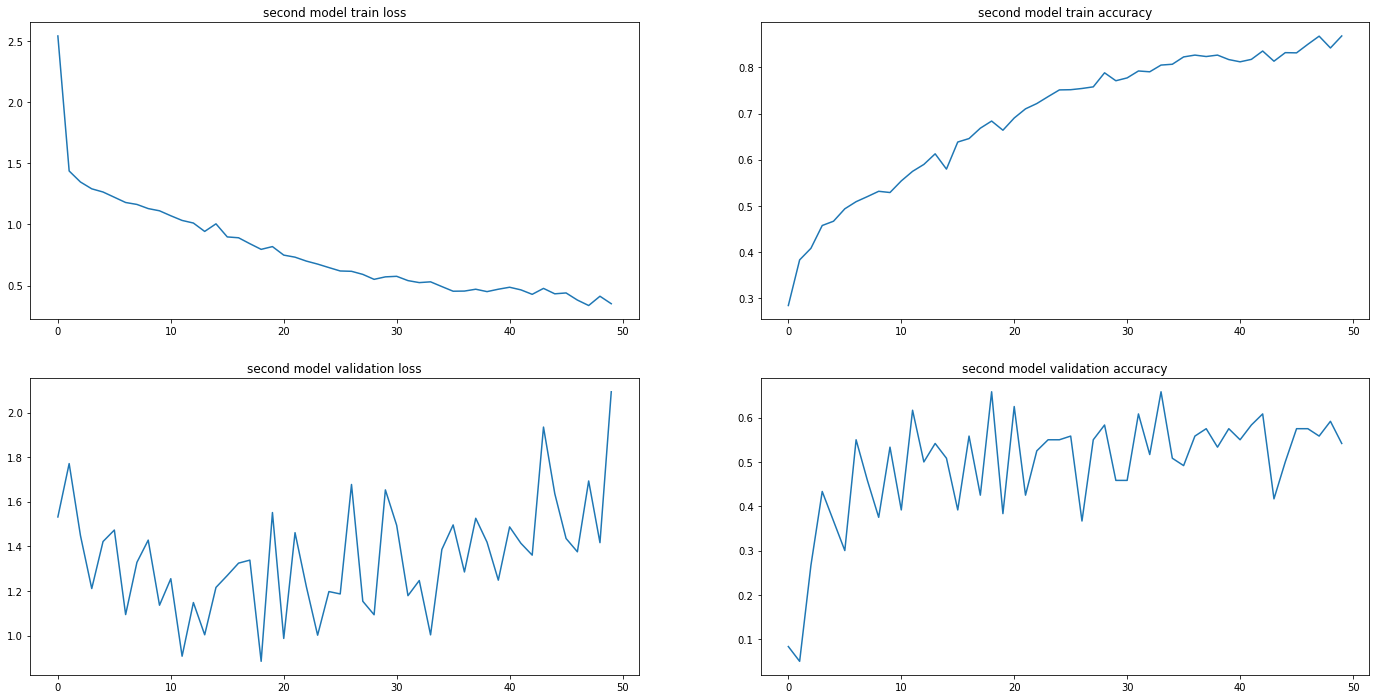

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(second_results.history["loss"])
ax[0][1].plot(second_results.history["accuracy"])
ax[1][0].plot(second_results.history["val_loss"])
ax[1][1].plot(second_results.history["val_accuracy"])

ax[0][0].set_title("second model train loss")
ax[0][1].set_title("second model train accuracy")
ax[1][0].set_title("second model validation loss")
ax[1][1].set_title("second model validation accuracy")
plt.show()

**4. Third model:**

In [33]:
third_model = Sequential([
    Conv2D(filters=8, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu', input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=12, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=18, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

third_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 192, 256, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 96, 128, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 48, 64, 12)      

In [34]:
third_model.compile(optimizer="adam", 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["accuracy"])

In [35]:
third_results = third_model.fit(x,
                                train_y,
                                validation_split=0.05,
                                epochs=50,
                                callbacks=[early_stop])

Epoch 1/50
71/71 [==============================] - 9s 99ms/step - loss: 8.6039 - accuracy: 0.2630 - val_loss: 7.5621 - val_accuracy: 0.0583
Epoch 2/50
71/71 [==============================] - 7s 95ms/step - loss: 6.6771 - accuracy: 0.3599 - val_loss: 6.1832 - val_accuracy: 0.2417
Epoch 3/50
71/71 [==============================] - 7s 95ms/step - loss: 5.5486 - accuracy: 0.3894 - val_loss: 5.3557 - val_accuracy: 0.2250
Epoch 4/50
71/71 [==============================] - 7s 96ms/step - loss: 4.7735 - accuracy: 0.4040 - val_loss: 4.5498 - val_accuracy: 0.3417
Epoch 5/50
71/71 [==============================] - 7s 97ms/step - loss: 4.1589 - accuracy: 0.4264 - val_loss: 4.1279 - val_accuracy: 0.2833
Epoch 6/50
71/71 [==============================] - 7s 99ms/step - loss: 3.6986 - accuracy: 0.4357 - val_loss: 3.8169 - val_accuracy: 0.2167
Epoch 7/50
71/71 [==============================] - 7s 99ms/step - loss: 3.3260 - accuracy: 0.4467 - val_loss: 3.6088 - val_accuracy: 0.1667
Epoch 8/50
71

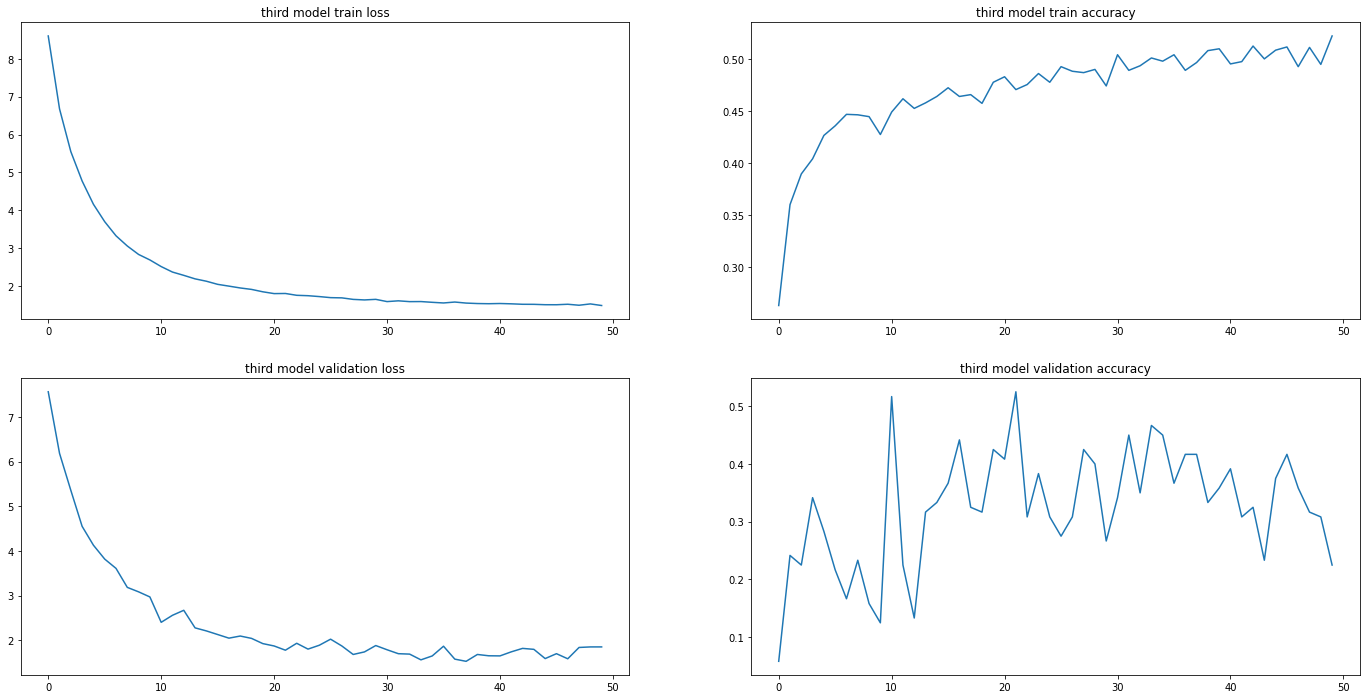

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(third_results.history["loss"])
ax[0][1].plot(third_results.history["accuracy"])
ax[1][0].plot(third_results.history["val_loss"])
ax[1][1].plot(third_results.history["val_accuracy"])

ax[0][0].set_title("third model train loss")
ax[0][1].set_title("third model train accuracy")
ax[1][0].set_title("third model validation loss")
ax[1][1].set_title("third model validation accuracy")
plt.show()